In [1]:
# Initial imports

from __future__ import division

import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# Imports for better visualization

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Load training data
train_data = pd.read_csv('../data/train.csv')

In [4]:
# Load testing data
test_data = pd.read_csv('../data/test.csv')

In [5]:
# View train data head
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
# View test data head
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [7]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# View train data shape
train_data.shape

(614, 13)

In [9]:
# Check for null values in train data
train_data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [10]:
# View test data shape
test_data.shape

(367, 12)

In [11]:
# Check for null values in test data
test_data.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [12]:
def num_missing(x):
  return sum(x.isnull())

In [13]:
print "Missing values per column:"
print train_data.apply(num_missing, axis=0) # axis=0 defines that function is to be applied on each column

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [14]:
print "Missing values per column:"
print test_data.apply(num_missing, axis=0)

Missing values per column:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [15]:
print 'Train:\n', train_data['Gender'].value_counts()
print 'Test:\n', test_data['Gender'].value_counts()

Train:
Male      489
Female    112
Name: Gender, dtype: int64
Test:
Male      286
Female     70
Name: Gender, dtype: int64


In [16]:
print 'Train:\n', train_data['Married'].value_counts()
print 'Test:\n', test_data['Married'].value_counts()

Train:
Yes    398
No     213
Name: Married, dtype: int64
Test:
Yes    233
No     134
Name: Married, dtype: int64


In [17]:
print 'Train:\n', train_data['Education'].value_counts()
print 'Test:\n', test_data['Education'].value_counts()

Train:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Test:
Graduate        283
Not Graduate     84
Name: Education, dtype: int64


In [18]:
print 'Train:\n', train_data['Self_Employed'].value_counts()
print 'Test:\n', test_data['Self_Employed'].value_counts()

Train:
No     500
Yes     82
Name: Self_Employed, dtype: int64
Test:
No     307
Yes     37
Name: Self_Employed, dtype: int64


In [19]:
print 'Train:\n', train_data['Loan_Amount_Term'].value_counts()
print 'Test:\n', test_data['Loan_Amount_Term'].value_counts()

Train:
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Test:
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64


In [20]:
print 'Train:\n', train_data['Credit_History'].value_counts()
print 'Test:\n', test_data['Credit_History'].value_counts()

Train:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Test:
1.0    279
0.0     59
Name: Credit_History, dtype: int64


In [21]:
print 'Train:\n', train_data['Property_Area'].value_counts()
print 'Test:\n', test_data['Property_Area'].value_counts()

Train:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Test:
Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64


In [22]:
print 'Train:\n', train_data['Dependents'].value_counts()
print 'Test:\n', test_data['Dependents'].value_counts()

Train:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Test:
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [23]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [24]:
data = train_data.append(test_data, ignore_index=True)

In [25]:
data.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No


In [26]:
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
dtype: object

In [27]:
data.shape

(981, 13)

In [28]:
# Very few self-employed women
print data[(data['Gender'] == 'Female') & (data['Self_Employed'] == 'Yes')].shape[0]
data[(data['Gender'] == 'Female') & (data['Self_Employed'] == 'Yes')]

19


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
54,11500,0.0,0.0,1,Graduate,Female,286.0,360.0,LP001186,N,Yes,Urban,Yes
113,7451,0.0,1.0,1,Graduate,Female,NaN,360.0,LP001392,Y,No,Semiurban,Yes
237,3463,0.0,NaN,0,Graduate,Female,122.0,360.0,LP001788,Y,No,Urban,Yes
286,2600,1717.0,1.0,0,Graduate,Female,99.0,300.0,LP001925,N,No,Semiurban,Yes
353,5500,0.0,0.0,0,Graduate,Female,105.0,360.0,LP002142,N,Yes,Rural,Yes
370,15759,0.0,1.0,0,Graduate,Female,55.0,360.0,LP002194,Y,No,Semiurban,Yes
404,7441,0.0,1.0,0,Graduate,Female,194.0,360.0,LP002301,N,No,Rural,Yes
410,3867,0.0,1.0,1,Not Graduate,Female,62.0,360.0,LP002318,N,No,Semiurban,Yes
430,8624,0.0,1.0,1,Graduate,Female,150.0,360.0,LP002377,Y,No,Semiurban,Yes
439,7142,0.0,1.0,0,Not Graduate,Female,138.0,360.0,LP002407,Y,Yes,Rural,Yes


In [29]:
data[data['Self_Employed'] == 'Yes'].shape[0]

119

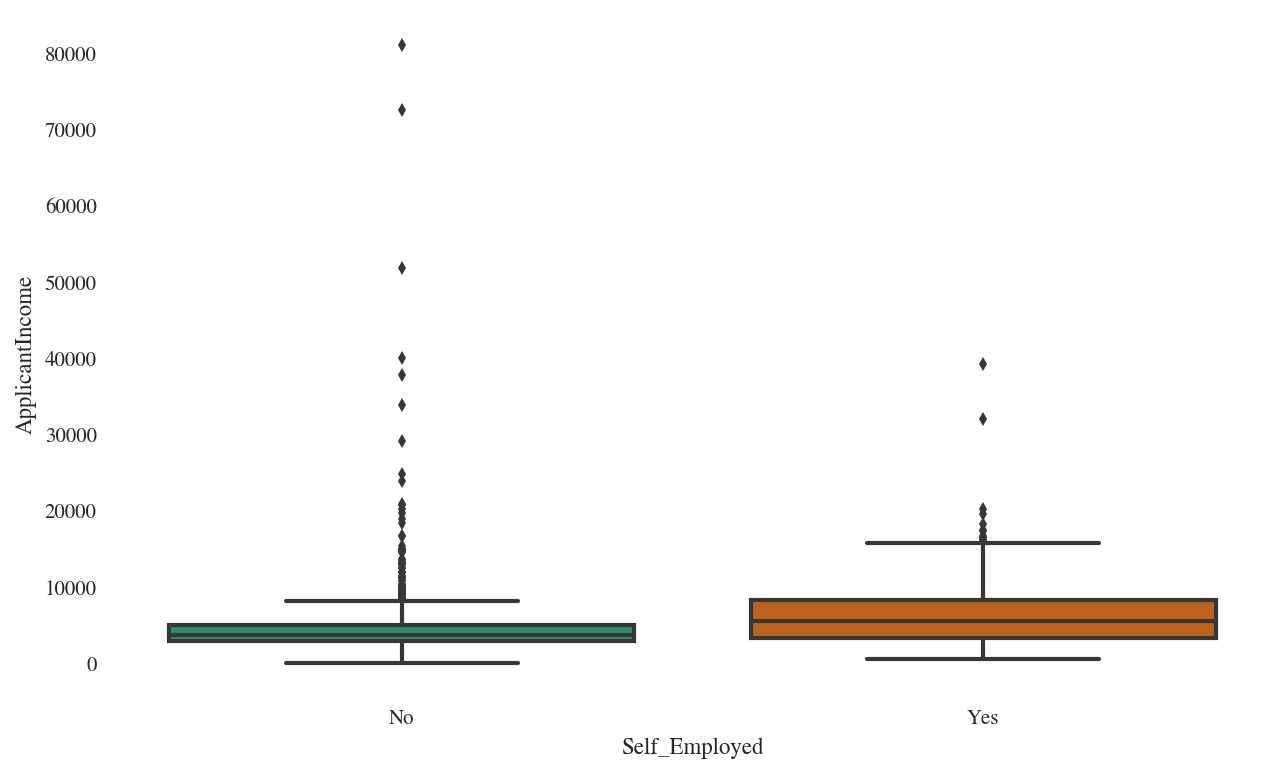

In [30]:
# Self-employed people tend to have higher income
sns.boxplot(y=data['ApplicantIncome'], x=data['Self_Employed'])

In [31]:
t = pd.crosstab(train_data['Loan_Status'], train_data['Dependents'])
t

Dependents,0,1,2,3+
Loan_Status,,,,
N,107,36,25,18
Y,238,66,76,33


In [32]:
for col in t.columns:
    print t[col][0]/t[col][1]

0.449579831933
0.545454545455
0.328947368421
0.545454545455


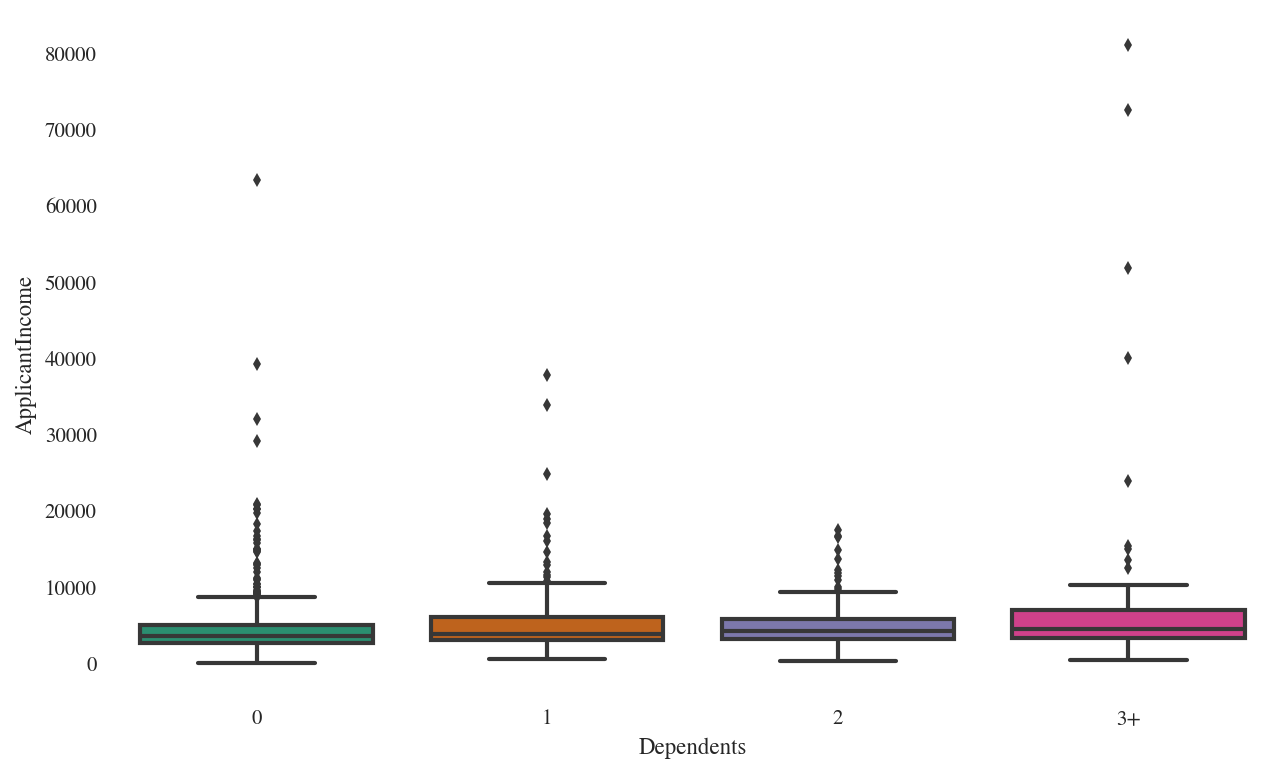

In [33]:
sns.boxplot(y=data['ApplicantIncome'], x=data['Dependents'])

In [34]:
for dep in train_data['Dependents'].dropna().unique():
    print 'Dependents: ' + str(dep)
    values = train_data[train_data['Dependents'] == dep]['Loan_Status'].value_counts()
    print values
    print values[1]/values[0]
    print

Dependents: 0
Y    238
N    107
Name: Loan_Status, dtype: int64
0.449579831933

Dependents: 1
Y    66
N    36
Name: Loan_Status, dtype: int64
0.545454545455

Dependents: 2
Y    76
N    25
Name: Loan_Status, dtype: int64
0.328947368421

Dependents: 3+
Y    33
N    18
Name: Loan_Status, dtype: int64
0.545454545455



In [35]:
print data.groupby('Self_Employed')['ApplicantIncome'].mean()
print
print data.groupby('Self_Employed')['ApplicantIncome'].std()

Self_Employed
No     4892.030979
Yes    6912.579832
Name: ApplicantIncome, dtype: float64

Self_Employed
No     5406.791932
Yes    5727.299800
Name: ApplicantIncome, dtype: float64


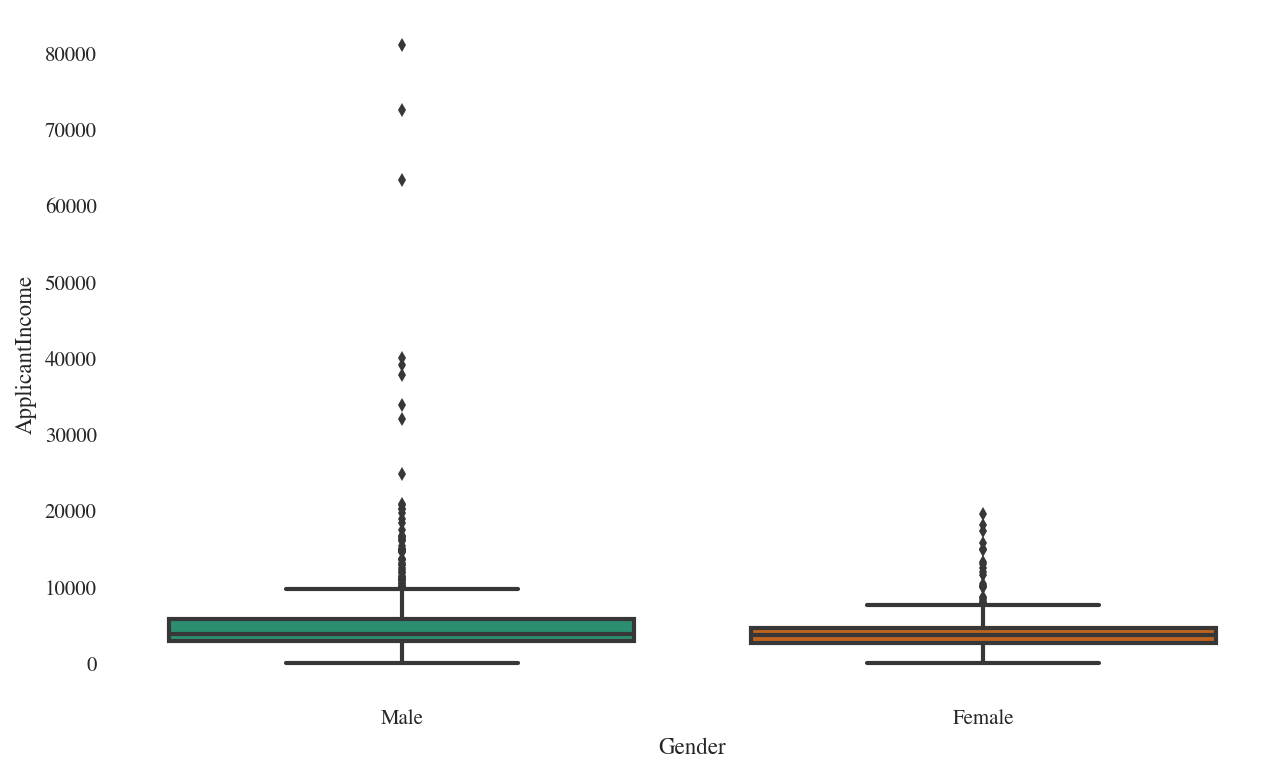

In [36]:
sns.boxplot(y=data['ApplicantIncome'], x=data['Gender'])

In [37]:
print data.groupby('Gender')['ApplicantIncome'].mean()
print
print data.groupby('Gender')['ApplicantIncome'].std()

Gender
Female    4458.906593
Male      5256.925161
Name: ApplicantIncome, dtype: float64

Gender
Female    3256.526063
Male      5838.815976
Name: ApplicantIncome, dtype: float64


In [38]:
data[data['Gender'] == 'Male'].groupby('Self_Employed')['ApplicantIncome'].mean()

Self_Employed
No     4961.632653
Yes    6740.765957
Name: ApplicantIncome, dtype: float64

In [39]:
data[data['Gender'] == 'Male'].groupby('Self_Employed')['ApplicantIncome'].std()

Self_Employed
No     5495.114467
Yes    5761.792516
Name: ApplicantIncome, dtype: float64

In [40]:
data[data['Gender'] == 'Male'].groupby('Self_Employed')['ApplicantIncome'].min()

Self_Employed
No        0
Yes    1000
Name: ApplicantIncome, dtype: int64

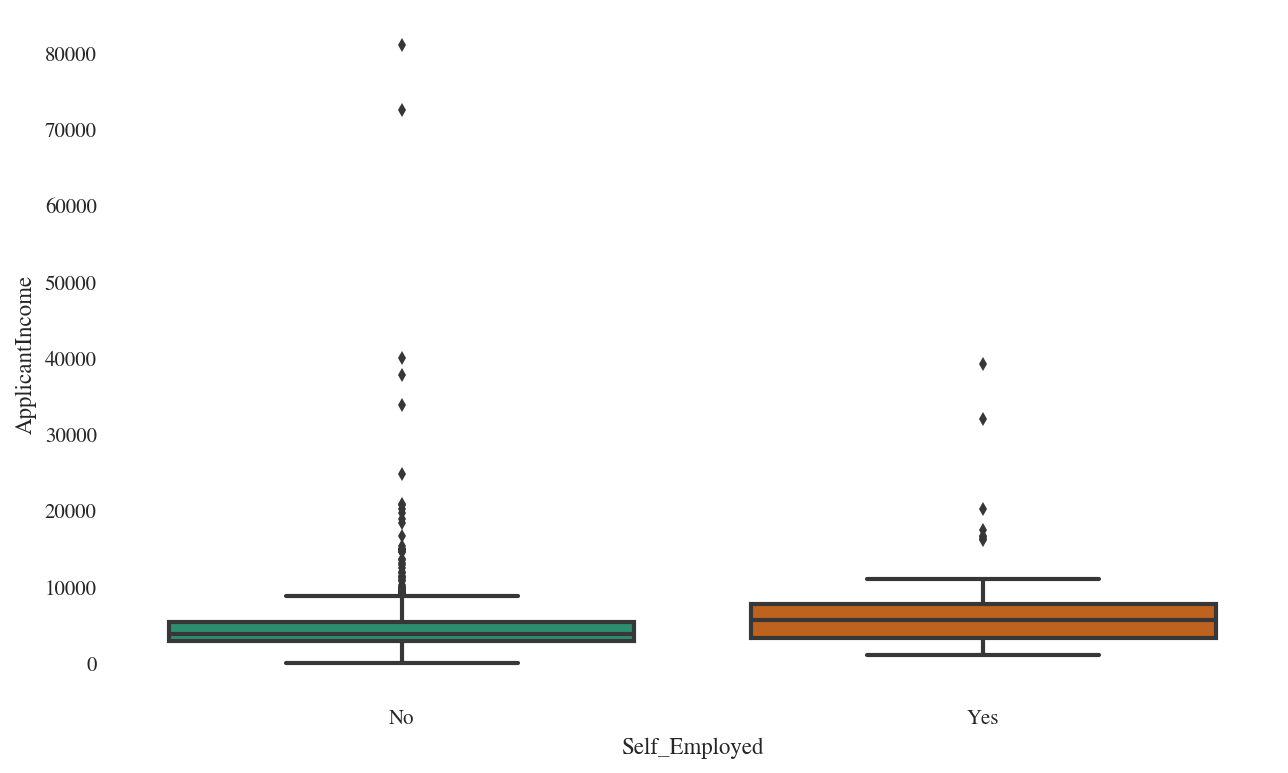

In [41]:
sns.boxplot(x=data[data['Gender'] == 'Male']['Self_Employed'], y=data[data['Gender'] == 'Male']['ApplicantIncome'])

In [42]:
data[data['Gender'] == 'Male'].groupby('Self_Employed').describe()

ApplicantIncome  CoapplicantIncome  Credit_History  \
Self_Employed                                                             
No            count       637.000000         637.000000      587.000000   
              mean       4961.632653        1751.977896        0.839864   
              std        5495.114531        2586.998003        0.367045   
              min           0.000000           0.000000        0.000000   
              25%        2914.000000           0.000000        1.000000   
              50%        3754.000000        1456.000000        1.000000   
              75%        5316.000000        2458.000000        1.000000   
              max       81000.000000       33837.000000        1.000000   
Yes           count        94.000000          94.000000       88.000000   
              mean       6740.765957        1619.734043        0.886364   
              std        5761.792552        2631.517891        0.319188   
              min        1000.000000           0.000000        0.000000   
              25%        3335.500000           0.000000        1.000000   
              50%        5590.000000         294.000000        1.000000   
              75%        7715.250000        2391.000000        1.000000   
              max       39147.000000       20000.000000        1.000000   

                     LoanAmount  Loan_Amount_Term  
Self_Employed                                      
No            count  617.000000        623.000000  
              mean   142.213938        341.406100  
              std     70.585190         65.426922  
              min     17.000000          6.000000  
              25%    102.000000        360.000000  
              50%    129.000000        360.000000  
              75%    164.000000        360.000000  
              max    600.000000        480.000000  
Yes           count   92.000000         92.000000  
              mean   163.760870        333.000000  
              std     99.903621         77.332733  
              min     25.000000         12.000000  
              25%    105.750000        360.000000  
              50%    139.500000        360.000000  
              75%    187.000000        360.000000  
              max    650.000000        480.000000

In [43]:
x = data['Gender'].value_counts()
x

Male      775
Female    182
Name: Gender, dtype: int64

In [44]:
y = data[data['ApplicantIncome'] < data['CoapplicantIncome']]['Gender'].value_counts()
y

Male      101
Female     22
Name: Gender, dtype: int64

In [45]:
print y[0]/x[0]
print y[1]/x[1]

0.130322580645
0.120879120879


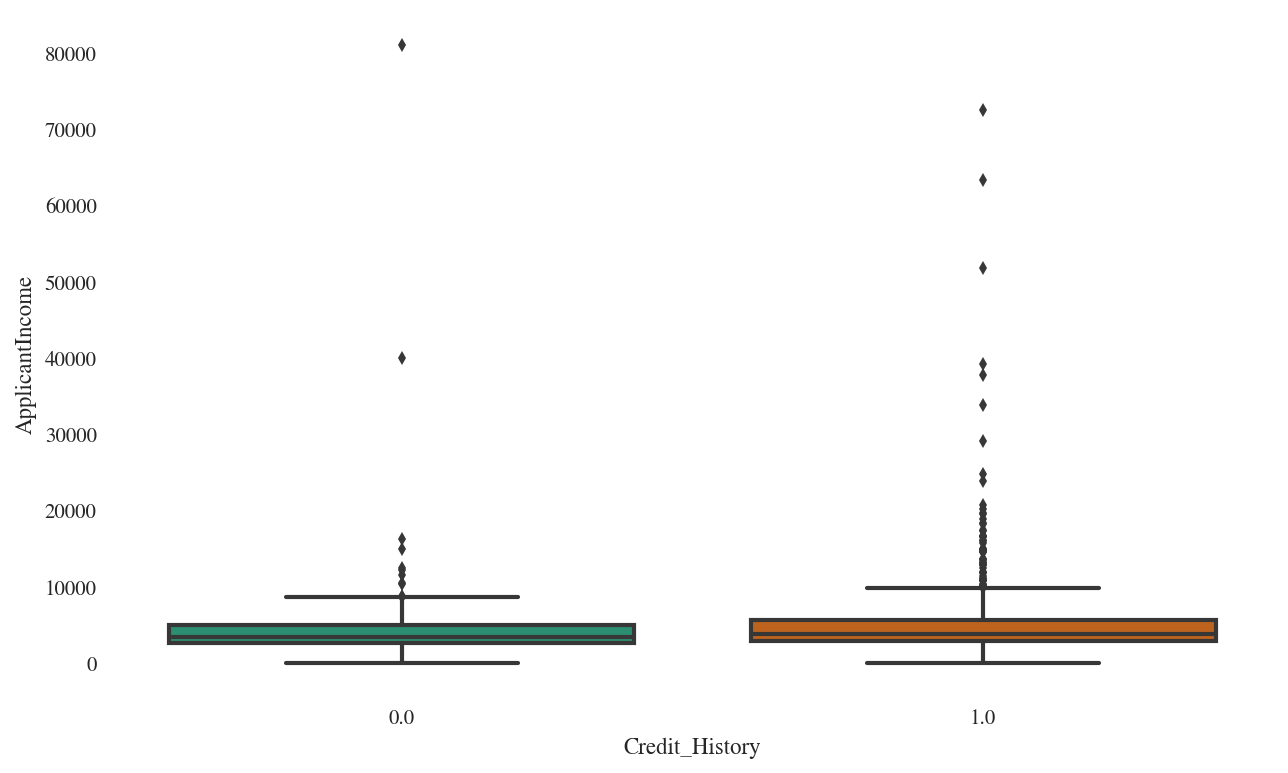

In [46]:
sns.boxplot(y=data['ApplicantIncome'], x=data['Credit_History'])

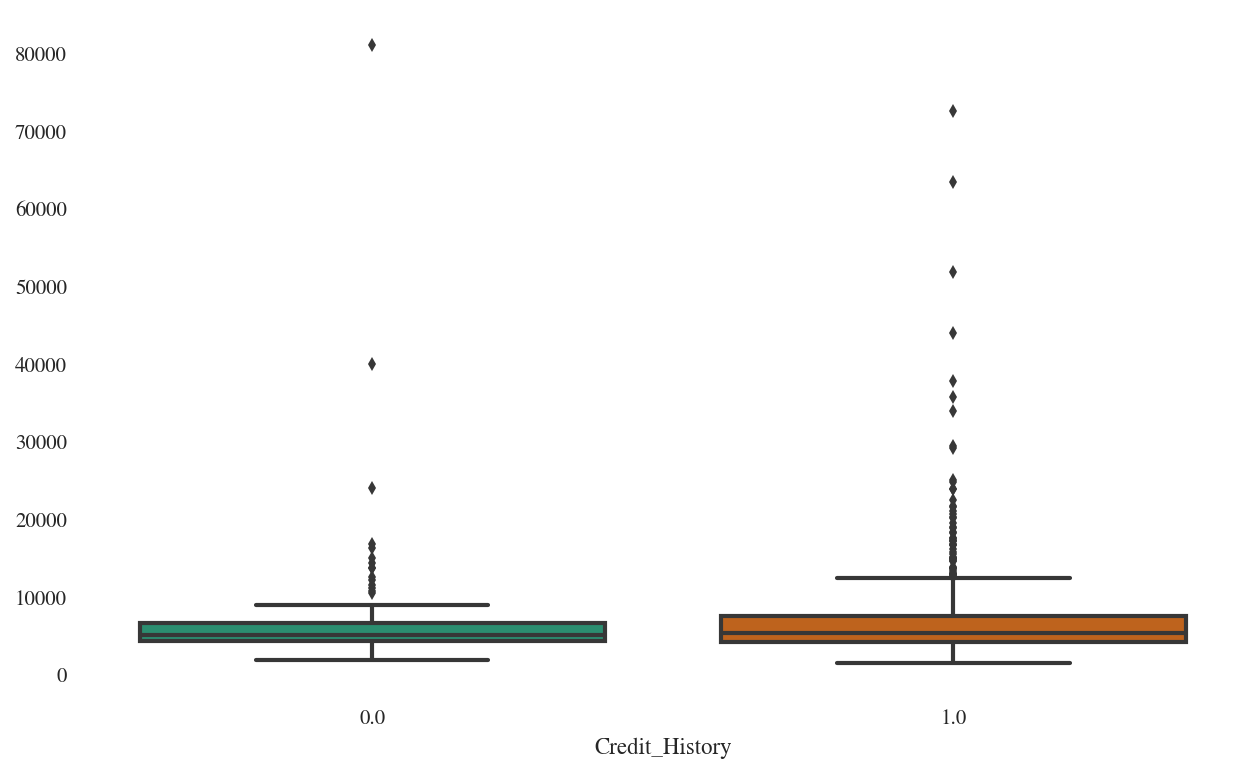

In [47]:
sns.boxplot(y=data['ApplicantIncome']+data['CoapplicantIncome'], x=data['Credit_History'])

In [48]:
pd.crosstab(data['Gender'], data['Credit_History'])

Credit_History,0.0,1.0
Gender,,
Female,30,135
Male,113,601


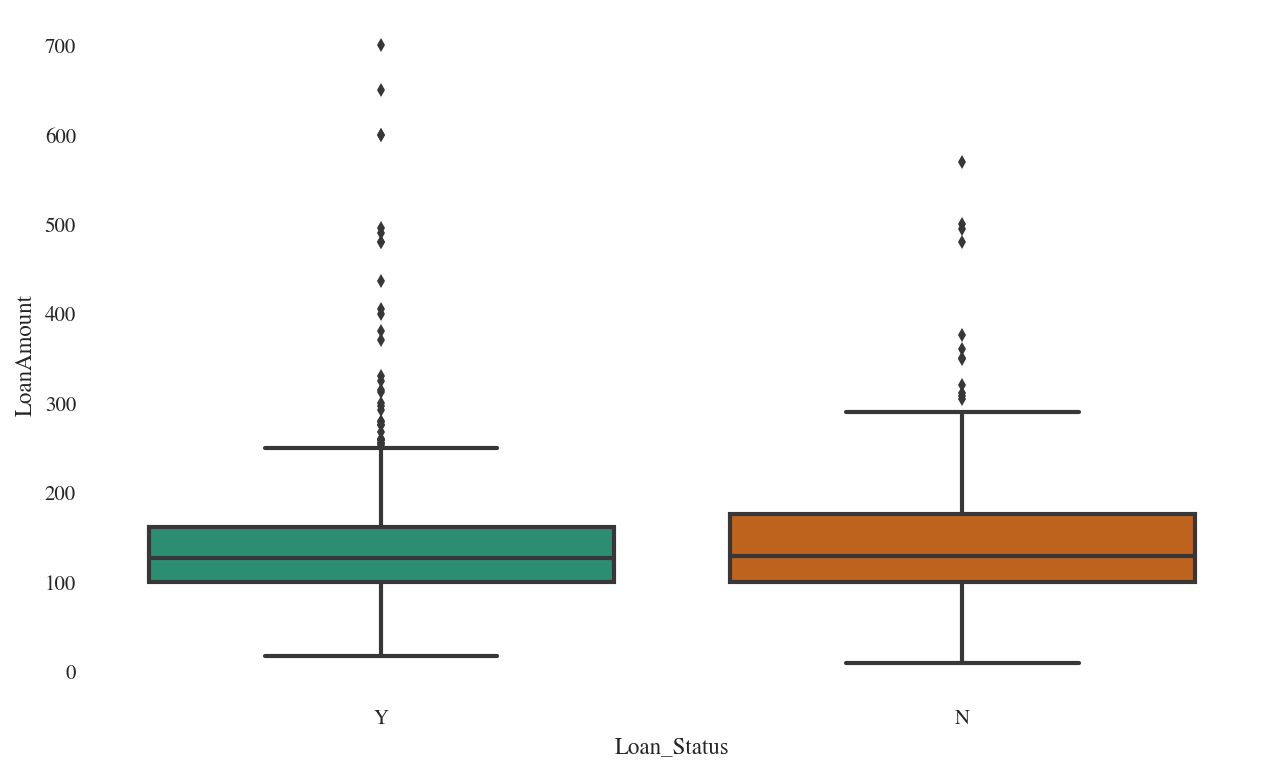

In [49]:
sns.boxplot(y=train_data['LoanAmount'], x=train_data['Loan_Status'])

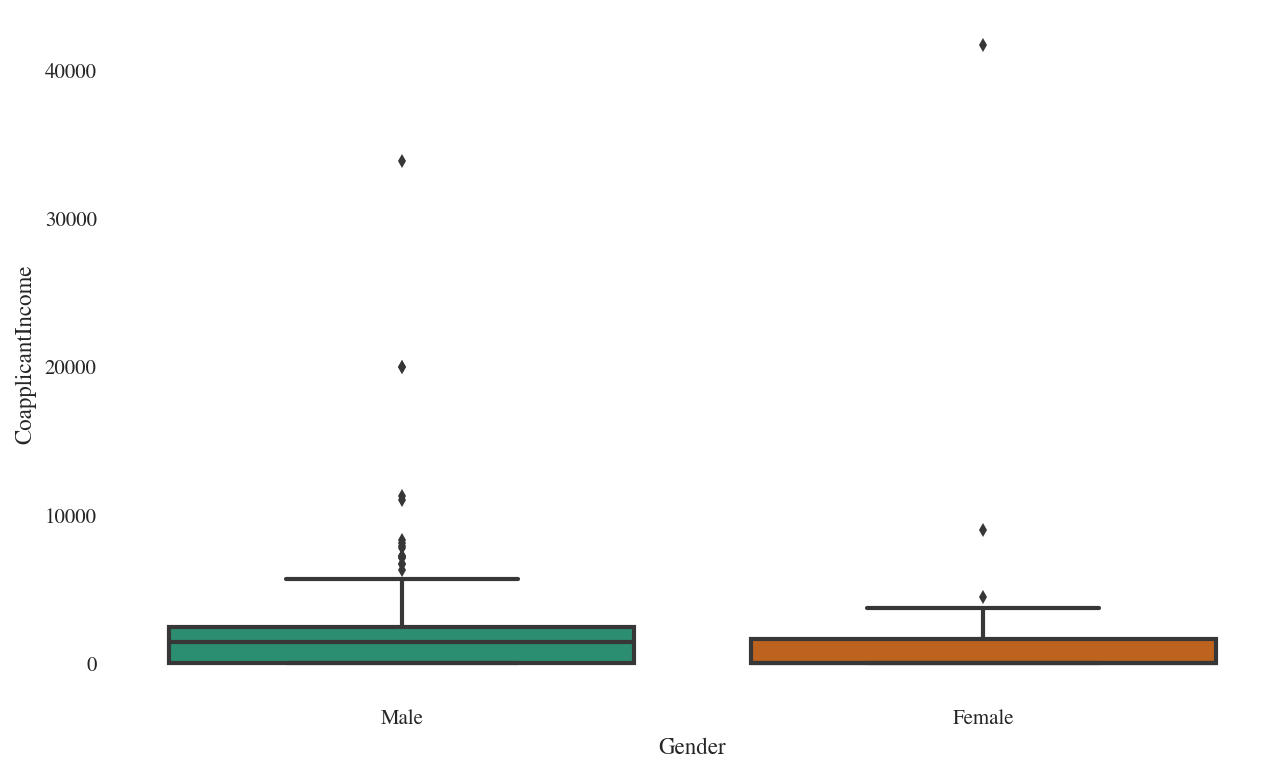

In [50]:
sns.boxplot(y=train_data['CoapplicantIncome'], x=train_data['Gender'])

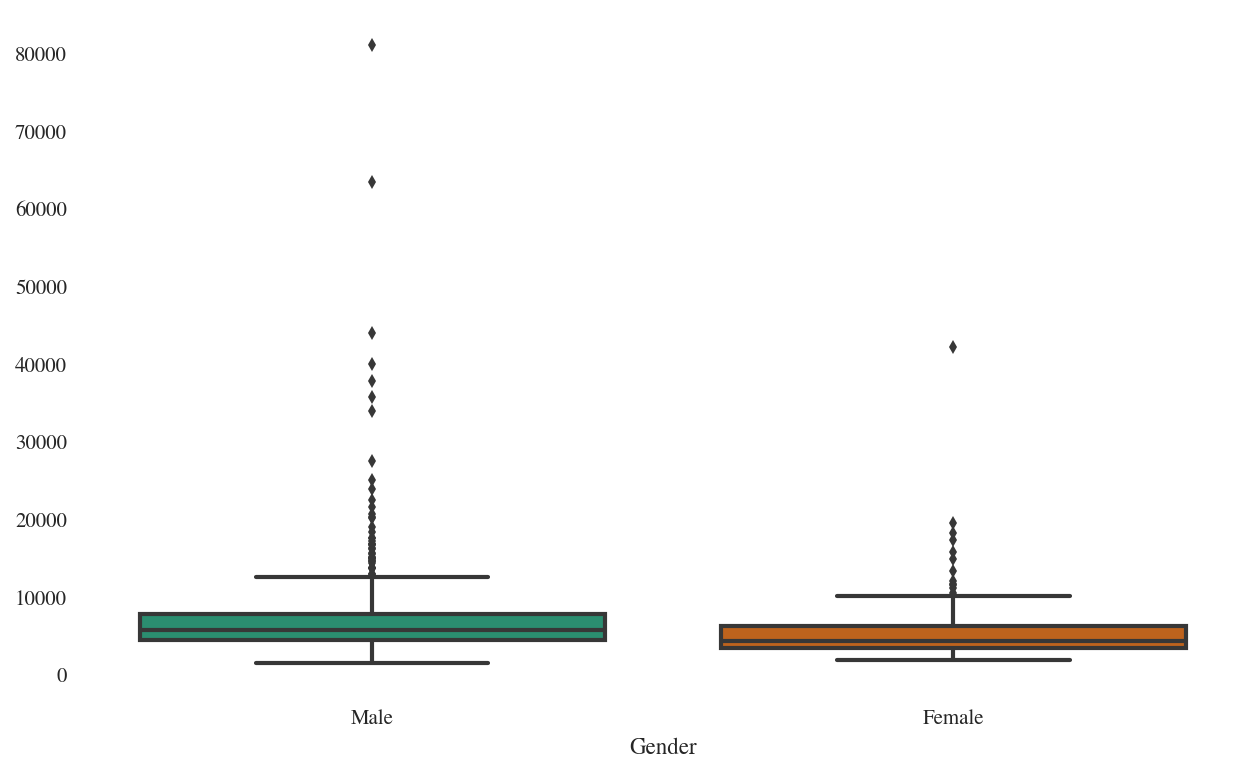

In [51]:
sns.boxplot(y=train_data['CoapplicantIncome']+train_data['ApplicantIncome'], x=train_data['Gender'])

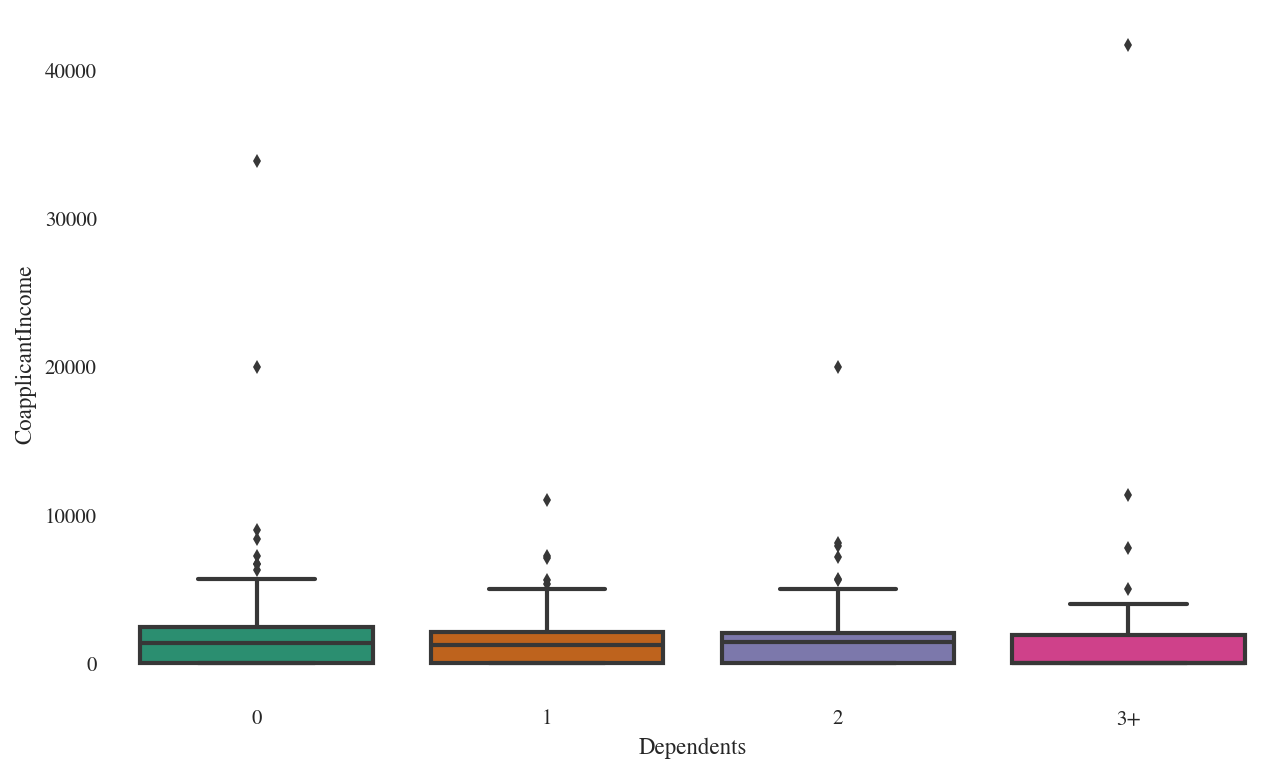

In [52]:
sns.boxplot(y=train_data['CoapplicantIncome'], x=train_data['Dependents'])

In [53]:
from sklearn import preprocessing

In [54]:
data['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [55]:
# loan_term_keys = dict(data['Loan_Amount_Term'].value_counts()).keys()
# loan_term_keys.sort()
# loan_term_keys

In [56]:
# loan_term = dict(zip(loan_term_keys, range(len(loan_term_keys))))
# loan_term

In [57]:
# train_data.ix[(train_data['Dependents'] == '3+'), 'Dependents'] = '3'

In [58]:
# train_data.Dependents.value_counts()

In [59]:
# train_data.Dependents.dtypes

In [60]:
def prepare_data(df, is_train):
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
    df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
    df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
#     df['Loan_Amount_Term'] = df['Loan_Amount_Term'].map(loan_term)
    dummies = pd.get_dummies(df['Property_Area'], prefix='Property_Area')
    dummies = dummies[dummies.columns[:-1]]
    df = pd.concat([df.drop(['Property_Area'], axis=1), dummies], axis=1)
    if is_train:
        df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
    return df.drop('Loan_ID', axis=1)

In [61]:
train = prepare_data(train_data.copy(), 1)

In [62]:
train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,0,0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,0,0
6,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,1,0,0
7,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,0,0,1
8,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,1,0,0
9,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,0,0,1


In [63]:
train.columns

Index([u'Gender', u'Married', u'Dependents', u'Education', u'Self_Employed',
       u'ApplicantIncome', u'CoapplicantIncome', u'LoanAmount',
       u'Loan_Amount_Term', u'Credit_History', u'Loan_Status',
       u'Property_Area_Rural', u'Property_Area_Semiurban'],
      dtype='object')

In [64]:
test = prepare_data(test_data.copy(), 0)

In [65]:
test.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,0,0
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,0,0
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,0,0
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,0,0
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,0,0
5,1.0,1,0.0,0,1.0,2165,3422,152.0,360.0,1.0,0,0
6,0.0,0,1.0,0,0.0,2226,0,59.0,360.0,1.0,0,1
7,1.0,1,2.0,0,0.0,3881,0,147.0,360.0,0.0,1,0
8,1.0,1,2.0,1,NaN,13633,0,280.0,240.0,1.0,0,0
9,1.0,0,0.0,0,0.0,2400,2400,123.0,360.0,1.0,0,1


In [66]:
test.columns

Index([u'Gender', u'Married', u'Dependents', u'Education', u'Self_Employed',
       u'ApplicantIncome', u'CoapplicantIncome', u'LoanAmount',
       u'Loan_Amount_Term', u'Credit_History', u'Property_Area_Rural',
       u'Property_Area_Semiurban'],
      dtype='object')

In [67]:
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [68]:
def fill_na(df):
    df['Gender'] = df['Gender'].fillna(1)
    df['Married'] = df['Married'].fillna(1)
#     df['Self_Employed'] = df['Self_Employed'].fillna(0)
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360)
    df['Credit_History'] = df['Credit_History'].fillna(1)
    df['Dependents'] = int(stats.mode(df['Dependents'])[0])
    for col in continuous_features:
        df[col] = df[col].fillna(data[col].dropna().mean())
    return df

In [69]:
train = fill_na(train)
test = fill_na(test)

In [70]:
pd.crosstab(data['Gender'], data['Self_Employed'])

Self_Employed,No,Yes
Gender,,
Female,152,19
Male,637,94


In [71]:
def fillna_self_employed(df):
    df.ix[(df['Gender'] == 1) & (df['ApplicantIncome'] >= 4000) & df['Self_Employed'].isnull(), 'Self_Employed'] = 1
    df['Self_Employed'] = df['Self_Employed'].fillna(0)
    return df

In [72]:
train = fillna_self_employed(train)
test = fillna_self_employed(test)

In [73]:
print train.apply(num_missing, axis=0)

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
dtype: int64


In [74]:
print test.apply(num_missing, axis=0)

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area_Rural        0
Property_Area_Semiurban    0
dtype: int64


In [75]:
cross = pd.crosstab(train['Gender'], train['Loan_Status'])
cross

Loan_Status,0,1
Gender,,
0.0,37,75
1.0,155,347


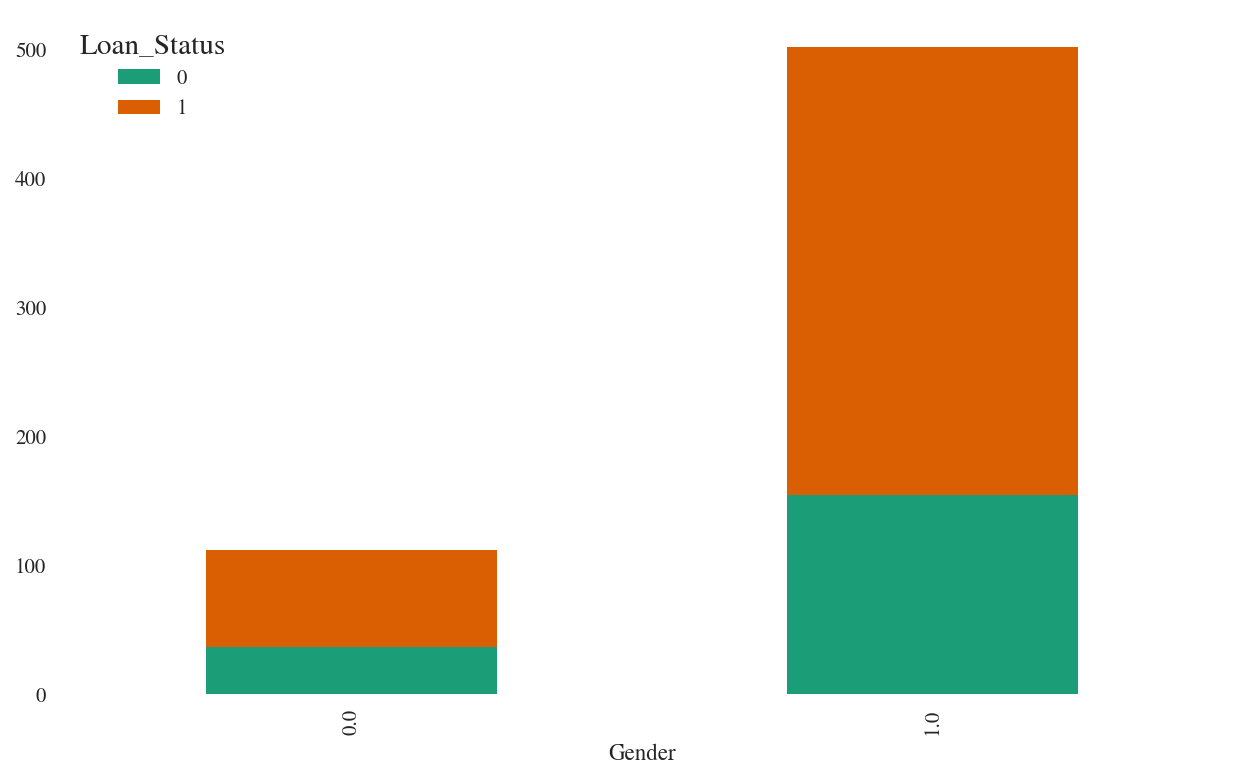

In [76]:
cross.plot.bar(stacked=True)

In [77]:
def feature_engineering(df):
#     df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['Income'] = (df['ApplicantIncome'] + df['CoapplicantIncome'])/df['LoanAmount']
    return df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1)

In [78]:
# train = feature_engineering(train)
# test = feature_engineering(test)

In [79]:
train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
0,1.0,0.0,0,1,0.0,5849,0.0,142.51153,360.0,1.0,1,0,0
1,1.0,1.0,0,1,0.0,4583,1508.0,128.00000,360.0,1.0,0,1,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.00000,360.0,1.0,1,0,0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.00000,360.0,1.0,1,0,0
4,1.0,0.0,0,1,0.0,6000,0.0,141.00000,360.0,1.0,1,0,0
5,1.0,1.0,0,1,1.0,5417,4196.0,267.00000,360.0,1.0,1,0,0
6,1.0,1.0,0,0,0.0,2333,1516.0,95.00000,360.0,1.0,1,0,0
7,1.0,1.0,0,1,0.0,3036,2504.0,158.00000,360.0,0.0,0,0,1
8,1.0,1.0,0,1,0.0,4006,1526.0,168.00000,360.0,1.0,1,0,0
9,1.0,1.0,0,1,0.0,12841,10968.0,349.00000,360.0,1.0,0,0,1


In [80]:
test.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban
0,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,0,0
1,1.0,1,0,1,0.0,3076,1500,126.0,360.0,1.0,0,0
2,1.0,1,0,1,0.0,5000,1800,208.0,360.0,1.0,0,0
3,1.0,1,0,1,0.0,2340,2546,100.0,360.0,1.0,0,0
4,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,0,0
5,1.0,1,0,0,1.0,2165,3422,152.0,360.0,1.0,0,0
6,0.0,0,0,0,0.0,2226,0,59.0,360.0,1.0,0,1
7,1.0,1,0,0,0.0,3881,0,147.0,360.0,0.0,1,0
8,1.0,1,0,1,1.0,13633,0,280.0,240.0,1.0,0,0
9,1.0,0,0,0,0.0,2400,2400,123.0,360.0,1.0,0,1


In [81]:
# Imports for model
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [82]:
# XGBoost Model

# Fit XGBRegressor

xgbr = XGBClassifier(n_estimators=100, silent=False)
x_train, x_test, y_train, y_test = train_test_split(train.drop('Loan_Status', axis=1), train['Loan_Status'], test_size=0.33, stratify=train['Loan_Status'])
xgbr.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

In [83]:
importances = sorted(list(xgbr.feature_importances_))[::-1]
importances

[0.32749563,
 0.24868652,
 0.11033275,
 0.085814364,
 0.064798601,
 0.05604203,
 0.049036779,
 0.02977233,
 0.014010508,
 0.0087565677,
 0.0052539404,
 0.0]

In [84]:
# Predict values on test data
predicted_train_xgb = xgbr.predict(x_test)

In [85]:
# Print log-loss
print accuracy_score(y_test, predicted_train_xgb)

0.812807881773


In [86]:
params = xgbr.get_params()

In [87]:
# Use complete data and predict values on actual test data
predicted_xgbr = xgbr.predict(test[x_test.columns])

In [88]:
# Create solution dataframe
solution_xgbr = pd.DataFrame(test_data['Loan_ID'])
solution_xgbr = pd.concat([solution_xgbr, pd.DataFrame(predicted_xgbr, columns=['Loan_Status'])], axis=1)
solution_xgbr['Loan_Status'] = solution_xgbr['Loan_Status'].map({1: 'Y', 0: 'N'})
solution_xgbr.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [89]:
# Export solution to csv file
solution_xgbr.to_csv('../submissions/solution_xgbr.csv', index=False, header=True)

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [92]:
predicted_train_rf = rf.predict(x_test)
predicted_train_rf

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [93]:
accuracy_score(y_test, predicted_train_rf)

0.79802955665024633

In [94]:
predicted_rf = rf.predict(test[x_test.columns])

In [95]:
# Create solution dataframe
solution_rf = pd.DataFrame(test_data['Loan_ID'])
solution_rf = pd.concat([solution_rf, pd.DataFrame(predicted_rf, columns=['Loan_Status'])], axis=1)
solution_rf['Loan_Status'] = solution_rf['Loan_Status'].map({1: 'Y', 0: 'N'})
solution_rf.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [96]:
# Export solution to csv file
solution_rf.to_csv('../submissions/solution_rf.csv', index=False, header=True)

In [97]:
import xgboost as xgb

In [98]:
def calc_accuracy(predictions, y_test):
    labels = y_test.get_label()
    return 'accuracy_score', (1 - sum(labels != predictions)/len(labels))

In [99]:
params = {"objective": "multi:softmax",
          'num_class': 2,
          "booster" : "gbtree",
          'learning_rate': 0.1,
          "max_depth": 3,
          "subsample": 0.75,
          'colsample_bylevel': 1,
          'gamma': 0,
          'min_child_weight': 1,
          "silent": 1,
          }

num_boost_round = 50

In [100]:
print("Train a XGBoost model")
dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, watchlist, feval=calc_accuracy, maximize=True, early_stopping_rounds=50, verbose_eval=True)

Train a XGBoost model
[0]	train-accuracy_score:0.817518	eval-accuracy_score:0.79803
Multiple eval metrics have been passed: 'eval-accuracy_score' will be used for early stopping.

Will train until eval-accuracy_score hasn't improved in 50 rounds.
[1]	train-accuracy_score:0.812652	eval-accuracy_score:0.807882
[2]	train-accuracy_score:0.815085	eval-accuracy_score:0.802956
[3]	train-accuracy_score:0.815085	eval-accuracy_score:0.802956
[4]	train-accuracy_score:0.812652	eval-accuracy_score:0.807882
[5]	train-accuracy_score:0.812652	eval-accuracy_score:0.807882
[6]	train-accuracy_score:0.812652	eval-accuracy_score:0.807882
[7]	train-accuracy_score:0.812652	eval-accuracy_score:0.807882
[8]	train-accuracy_score:0.812652	eval-accuracy_score:0.807882
[9]	train-accuracy_score:0.812652	eval-accuracy_score:0.807882
[10]	train-accuracy_score:0.812652	eval-accuracy_score:0.807882
[11]	train-accuracy_score:0.812652	eval-accuracy_score:0.807882
[12]	train-accuracy_score:0.815085	eval-accuracy_score:0.8

In [101]:
import operator

In [102]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()

def get_data(df):
    features = list(df.drop('Loan_Status', axis=1))
    y_train = df['Loan_Status']
    for feat in train.select_dtypes(include=['object']).columns:
        m = train.groupby([feat])['Loan_Status'].mean()
        train[feat].replace(m,inplace=True)
    x_train = train[features]
    return features, x_train, y_train

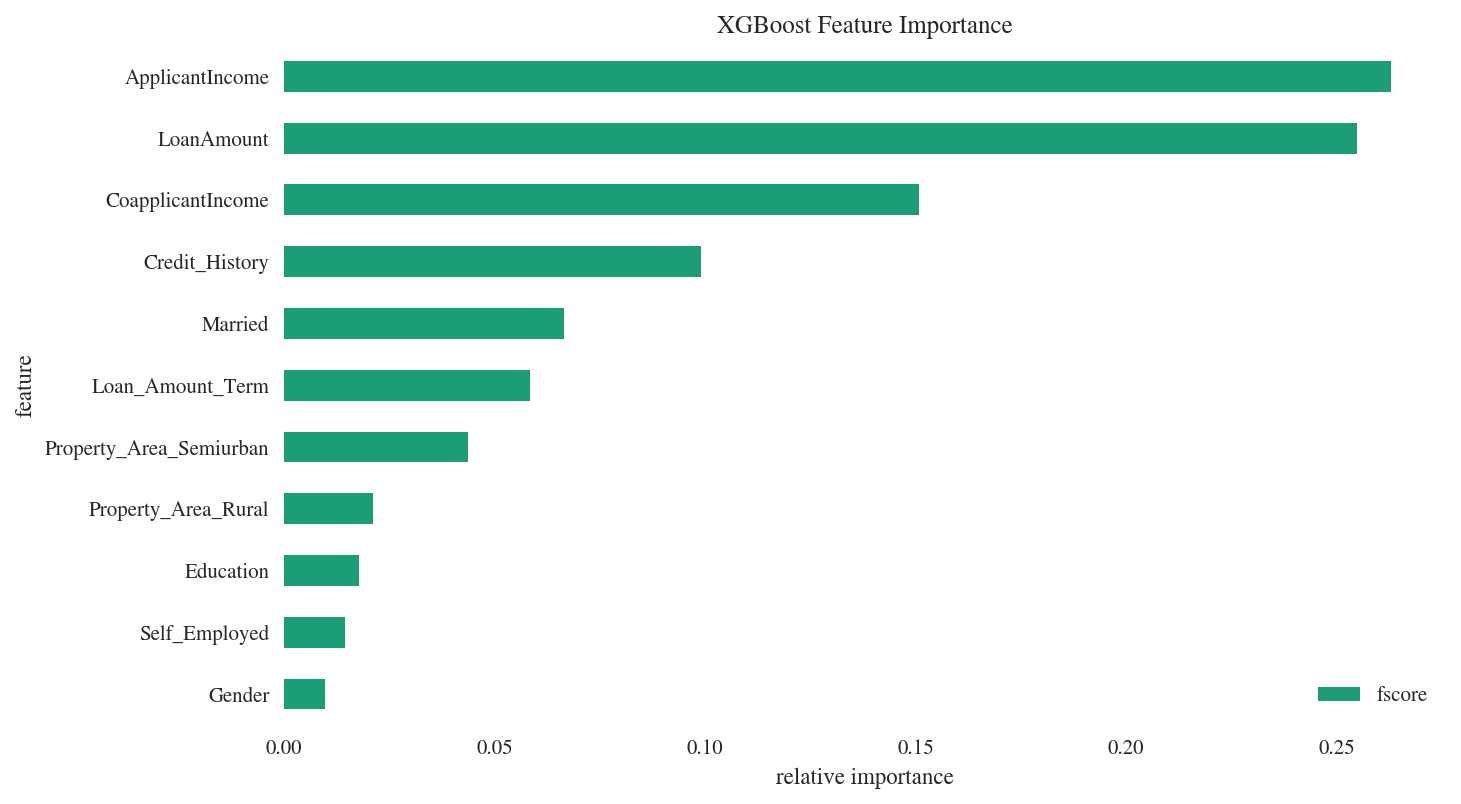

In [103]:
features, x_train, y_train = get_data(train)
ceate_feature_map(train.drop('Loan_Status', axis=1))

importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df_importances = pd.DataFrame(importance, columns=['feature', 'fscore'])
df_importances['fscore'] = df_importances['fscore'] / df_importances['fscore'].sum()

df_importances.plot(kind='barh', x='feature', y='fscore')
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
# plt.gcf().savefig('feature_importance_xgb.png')

In [104]:
df_importances

,feature,fscore
0,Gender,0.009740
1,Self_Employed,0.014610
2,Education,0.017857
3,Property_Area_Rural,0.021104
4,Property_Area_Semiurban,0.043831
5,Loan_Amount_Term,0.058442
6,Married,0.066558
7,Credit_History,0.099026
8,CoapplicantIncome,0.150974
9,LoanAmount,0.254870


In [105]:
predicted_train_xgb = gbm.predict(xgb.DMatrix(x_test))

In [106]:
predicted_train_xgb

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1

In [107]:
accuracy_score(y_test, predicted_train_xgb)

0.80295566502463056

In [108]:
predicted_xgb = gbm.predict(xgb.DMatrix(test))

In [109]:
# Create solution dataframe
solution_xgb = pd.DataFrame(test_data['Loan_ID'])
solution_xgb = pd.concat([solution_xgb, pd.DataFrame(predicted_xgb, columns=['Loan_Status'])], axis=1)
solution_xgb['Loan_Status'] = solution_xgb['Loan_Status'].map({1: 'Y', 0: 'N'})
solution_xgb.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [110]:
# Export solution to csv file
solution_xgb.to_csv('../submissions/solution_xgb.csv', index=False)

In [111]:
# Imports for Oversampling (since data is highly imbalanced + small)

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [112]:
train_features = train.drop('Loan_Status', axis=1)
target = train['Loan_Status']

In [113]:
train_data['Loan_Status'].value_counts()[1]/train_data['Loan_Status'].value_counts()[0]

0.45497630331753552

In [114]:
# Generate the new dataset using over-sampling method

verbose = False
ratio = 'auto'

# 'Random over-sampling'
OS = RandomOverSampler(ratio=ratio)
train_os_features, train_os_target = OS.fit_sample(train_features, target.values.ravel())

# 'SMOTE'
smote = SMOTE(ratio=ratio, kind='regular')
train_smo_features, train_smo_target = smote.fit_sample(train_features, target.values.ravel())

In [115]:
# Convert the generated numpy arrays into data frames

train_os_features = DataFrame(train_os_features, columns=train_features.columns)
train_os_target = DataFrame(train_os_target, columns=['Loan_Status'])

train_smo_features = DataFrame(train_smo_features, columns=train_features.columns)
train_smo_target = DataFrame(train_smo_target, columns=['Loan_Status'])

In [116]:
# Check total number of samples

print train_os_target.shape
print train_smo_target.shape

(844, 1)
(844, 1)


In [117]:
# Check how the new balanced data are distributed

print train_os_target['Loan_Status'].value_counts()
print train_smo_target['Loan_Status'].value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64
1    422
0    422
Name: Loan_Status, dtype: int64


In [118]:
features_dfs = [train_os_features, train_smo_features]
target_dfs = [train_os_target, train_smo_target]
os_types = ['ros', 'smo']

In [119]:
for i, df in enumerate(features_dfs):
    x_train, x_test, y_train, y_test = train_test_split(df, target_dfs[i]['Loan_Status'], test_size=0.33, stratify=target_dfs[i]['Loan_Status'])
    
    # SKLEARN XGBOOST
    xgbr = XGBClassifier(n_estimators=100, silent=False)
    xgbr.fit(x_train, y_train)

    predicted_train_xgb = xgbr.predict(x_test)
    print os_types[i] + ': ', accuracy_score(y_test, predicted_train_xgb)
    predicted_xgbr = xgbr.predict(test[x_test.columns])

    solution_xgbr = pd.DataFrame(test_data['Loan_ID'])
    solution_xgbr = pd.concat([solution_xgbr, pd.DataFrame(predicted_xgbr, columns=['Loan_Status'])], axis=1)
    solution_xgbr['Loan_Status'] = solution_xgbr['Loan_Status'].map({1: 'Y', 0: 'N'})
    solution_xgbr.to_csv('../submissions/solution_xgbr_' + os_types[i] + '.csv', index=False, header=True)
#     print solution_xgbr.head(10)


    # RANDOM FOREST
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(x_train, y_train)

    predicted_train_rf = rf.predict(x_test)
    print os_types[i] + ': ', accuracy_score(y_test, predicted_train_rf)
    predicted_rf = rf.predict(test[x_test.columns])

    solution_rf = pd.DataFrame(test_data['Loan_ID'])
    solution_rf = pd.concat([solution_rf, pd.DataFrame(predicted_rf, columns=['Loan_Status'])], axis=1)
    solution_rf['Loan_Status'] = solution_rf['Loan_Status'].map({1: 'Y', 0: 'N'})
    solution_rf.to_csv('../submissions/solution_rf_' + os_types[i] + '.csv', index=False, header=True)
#     print solution_rf.head(10)


    # XGBOOST
    params = {"objective": "multi:softmax",
              'num_class': 2,
              "booster" : "gbtree",
              'learning_rate': 0.1,
              "max_depth": 3,
              "subsample": 0.75,
              "colsample_bytree": 1,
              'colsample_bylevel': 1,
              'gamma': 0,
              'min_child_weight': 1,
              "silent": 1,
              }

    num_boost_round = 50

    print("Train a XGBoost model")
    dtrain = xgb.DMatrix(x_train, y_train)
    dvalid = xgb.DMatrix(x_test, y_test)

    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, watchlist, feval=calc_accuracy, maximize=True, early_stopping_rounds=50, verbose_eval=True)

    predicted_train_xgb = gbm.predict(xgb.DMatrix(x_test))
    print os_types[i] + ': ', accuracy_score(y_test, predicted_train_xgb)
    predicted_xgb = gbm.predict(xgb.DMatrix(test))

    solution_xgb = pd.DataFrame(test_data['Loan_ID'])
    solution_xgb = pd.concat([solution_xgb, pd.DataFrame(predicted_xgb, columns=['Loan_Status'])], axis=1)
    solution_xgb['Loan_Status'] = solution_xgb['Loan_Status'].map({1: 'Y', 0: 'N'})
    solution_xgb.to_csv('../submissions/solution_xgb_' + os_types[i] + '.csv', index=False)
#     print solution_xgb.head(10)

ros:  0.73835125448
ros:  0.845878136201
Train a XGBoost model
[0]	train-accuracy_score:0.743363	eval-accuracy_score:0.716846
Multiple eval metrics have been passed: 'eval-accuracy_score' will be used for early stopping.

Will train until eval-accuracy_score hasn't improved in 50 rounds.
[1]	train-accuracy_score:0.736283	eval-accuracy_score:0.731183
[2]	train-accuracy_score:0.736283	eval-accuracy_score:0.72043
[3]	train-accuracy_score:0.743363	eval-accuracy_score:0.702509
[4]	train-accuracy_score:0.750442	eval-accuracy_score:0.716846
[5]	train-accuracy_score:0.745133	eval-accuracy_score:0.716846
[6]	train-accuracy_score:0.746903	eval-accuracy_score:0.716846
[7]	train-accuracy_score:0.743363	eval-accuracy_score:0.724014
[8]	train-accuracy_score:0.741593	eval-accuracy_score:0.724014
[9]	train-accuracy_score:0.750442	eval-accuracy_score:0.731183
[10]	train-accuracy_score:0.745133	eval-accuracy_score:0.724014
[11]	train-accuracy_score:0.743363	eval-accuracy_score:0.724014
[12]	train-accura